In [107]:
import librosa
import numpy as np
from scipy.fft import fft, fftfreq, rfft, rfftfreq
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [108]:
TEE_AUDIO = "D:\\Github\\Music-Rec-RAC-DataSci\\Tee cover\\Tee Sample 2.mp3"
ORG_AUDIO = "D:\\Github\\Music-Rec-RAC-DataSci\\org song\\น้อง - Three Man Down Feat. URBOYTJ _Official MV_\\vocals.mp3"

y_tee, sr_tee = librosa.load(TEE_AUDIO)
y_org, sr_org = librosa.load(ORG_AUDIO)

# y_tee = y_tee[:2000000]
# y_org = y_org[500000:2500000]

max_shape = max(y_tee.shape[0], y_org.shape[0])
y_tee = np.pad(y_tee, (0, max_shape - y_tee.shape[0]), 'empty')
y_org = np.pad(y_org, (0, max_shape - y_org.shape[0]), 'empty')


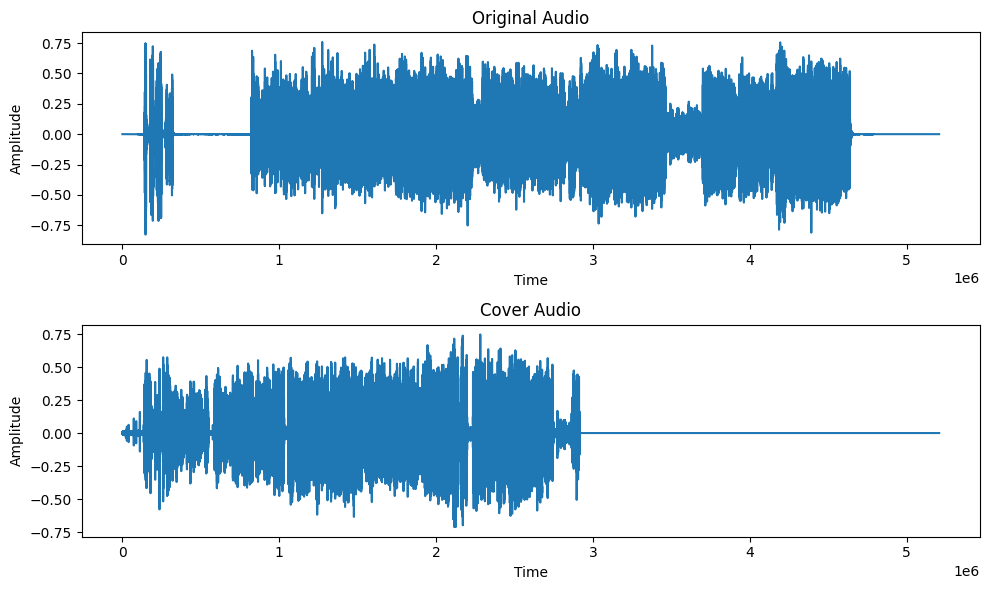

In [112]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(y_org)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Audio')

plt.subplot(2, 1, 2)
plt.plot(y_tee)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Cover Audio')

plt.tight_layout()
plt.show()

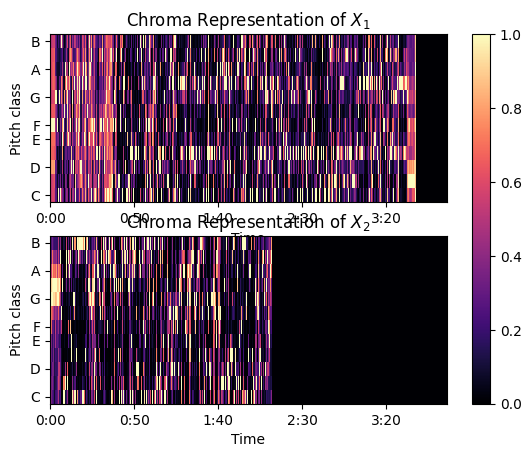

In [110]:
# Using Audio Sync: https://librosa.org/doc/main/auto_examples/plot_music_sync.html , https://librosa.org/librosa_gallery/auto_examples/plot_music_sync.html

n_fft = 4410
hop_size = 2205

y_org_chroma = librosa.feature.chroma_stft(y=y_org,
                                         sr=sr_org,
                                        #  tuning=0,
                                        #  norm=2,
                                         hop_length=hop_size,
                                        #  n_fft=n_fft
                                         )
y_tee_chroma = librosa.feature.chroma_stft(y=y_tee,
                                         sr=sr_tee,
                                        #  tuning=0,
                                        #  norm=2,
                                         hop_length=hop_size,
                                        #  n_fft=n_fft
                                         )

fig, ax = plt.subplots(nrows=2, sharey=True)
img = librosa.display.specshow(y_org_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_size, ax=ax[0])
ax[0].set(title='Chroma Representation of $X_1$')
librosa.display.specshow(y_tee_chroma, x_axis='time',
                         y_axis='chroma',
                         hop_length=hop_size, ax=ax[1])
ax[1].set(title='Chroma Representation of $X_2$')
fig.colorbar(img, ax=ax)


In [111]:
D, wp = librosa.sequence.dtw(X=y_org_chroma, Y=y_org_chroma, metric='cosine')
wp_s = np.asarray(wp) * hop_size / sr_org

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=sr_org,
                               cmap='gray_r', hop_length=hop_size, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time $(X_2)$', ylabel='Time $(X_1)$')
fig.colorbar(img, ax=ax)

ParameterError: DTW cost matrix C has NaN values. 

In [ ]:
# Debug 
# ParameterError: DTW cost matrix C has NaN values. 
import scipy

C = scipy.spatial.distance.cdist(y_org_chroma.T, y_tee_chroma.T, metric='euclidean')
C.shape

(2362, 2362)

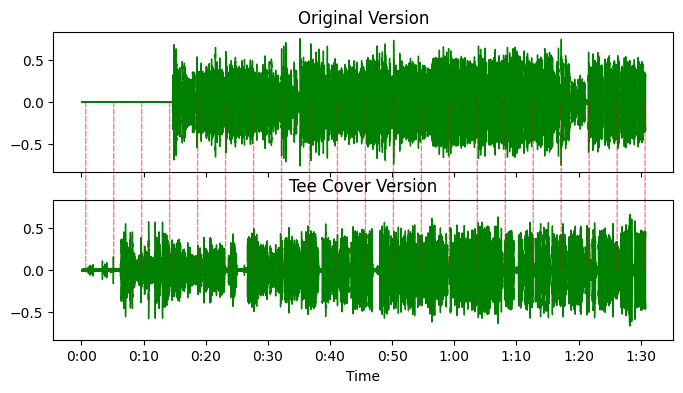

In [ ]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,4))

# Plot x_2
librosa.display.waveshow(y_tee, sr=sr_tee, ax=ax2, color='g')
ax2.set(title='Tee Cover Version')

# Plot x_1
librosa.display.waveshow(y_org, sr=sr_org, ax=ax1, color='g')
ax1.set(title='Original Version')
ax1.label_outer()


n_arrows = 20
for tp1, tp2 in wp_s[::len(wp_s)//n_arrows]:
    # Create a connection patch between the aligned time points
    # in each subplot
    con = ConnectionPatch(xyA=(tp1, 0), xyB=(tp2, 0),
                          axesA=ax1, axesB=ax2,
                          coordsA='data', coordsB='data',
                          color='r', linestyle='--',
                          alpha=0.5)
    con.set_in_layout(False)  # This is needed to preserve layout
    ax2.add_artist(con)